In [36]:
library('tidyverse')
library('patchwork')
library('nycflights13')
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

Use filter to make a table with just flights weather data from January.

In [18]:
weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [19]:
df.1<-weather%>% filter(month==1)

Do the same for June.

In [20]:
df.6<-weather%>% filter(month==6)

Use `filter` and `summarize` to produce two single row tables. One that has the median `temp` for January, and one that has the median `temp` for June.

In [27]:
# E.g.

median.january  = weather %>% 
    group_by(month) %>%
    filter(month == 1) %>% 
    summarize(median.temp = median(temp))%>%
    select(median.temp)
median.june  = weather %>% 
    group_by(month) %>%
    filter(month == 6) %>% 
    summarize(median.temp = median(temp))%>%
    select(median.temp)
median.january


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



median.temp
<dbl>
37.04


Re-create the following figure.

<img src="./example.png" style="width: 800px;" />

- Use `geom_hline` for the median line.
- Use `scale_color_viridis_c` to set the color scale.
- This chart can be made by facetting or each plot can be created by itself and combined with `patchwork`. For this example use `patchwork`.
- Use `ylim` to make the y-axis for each plot the same. 

In [33]:
?ylim


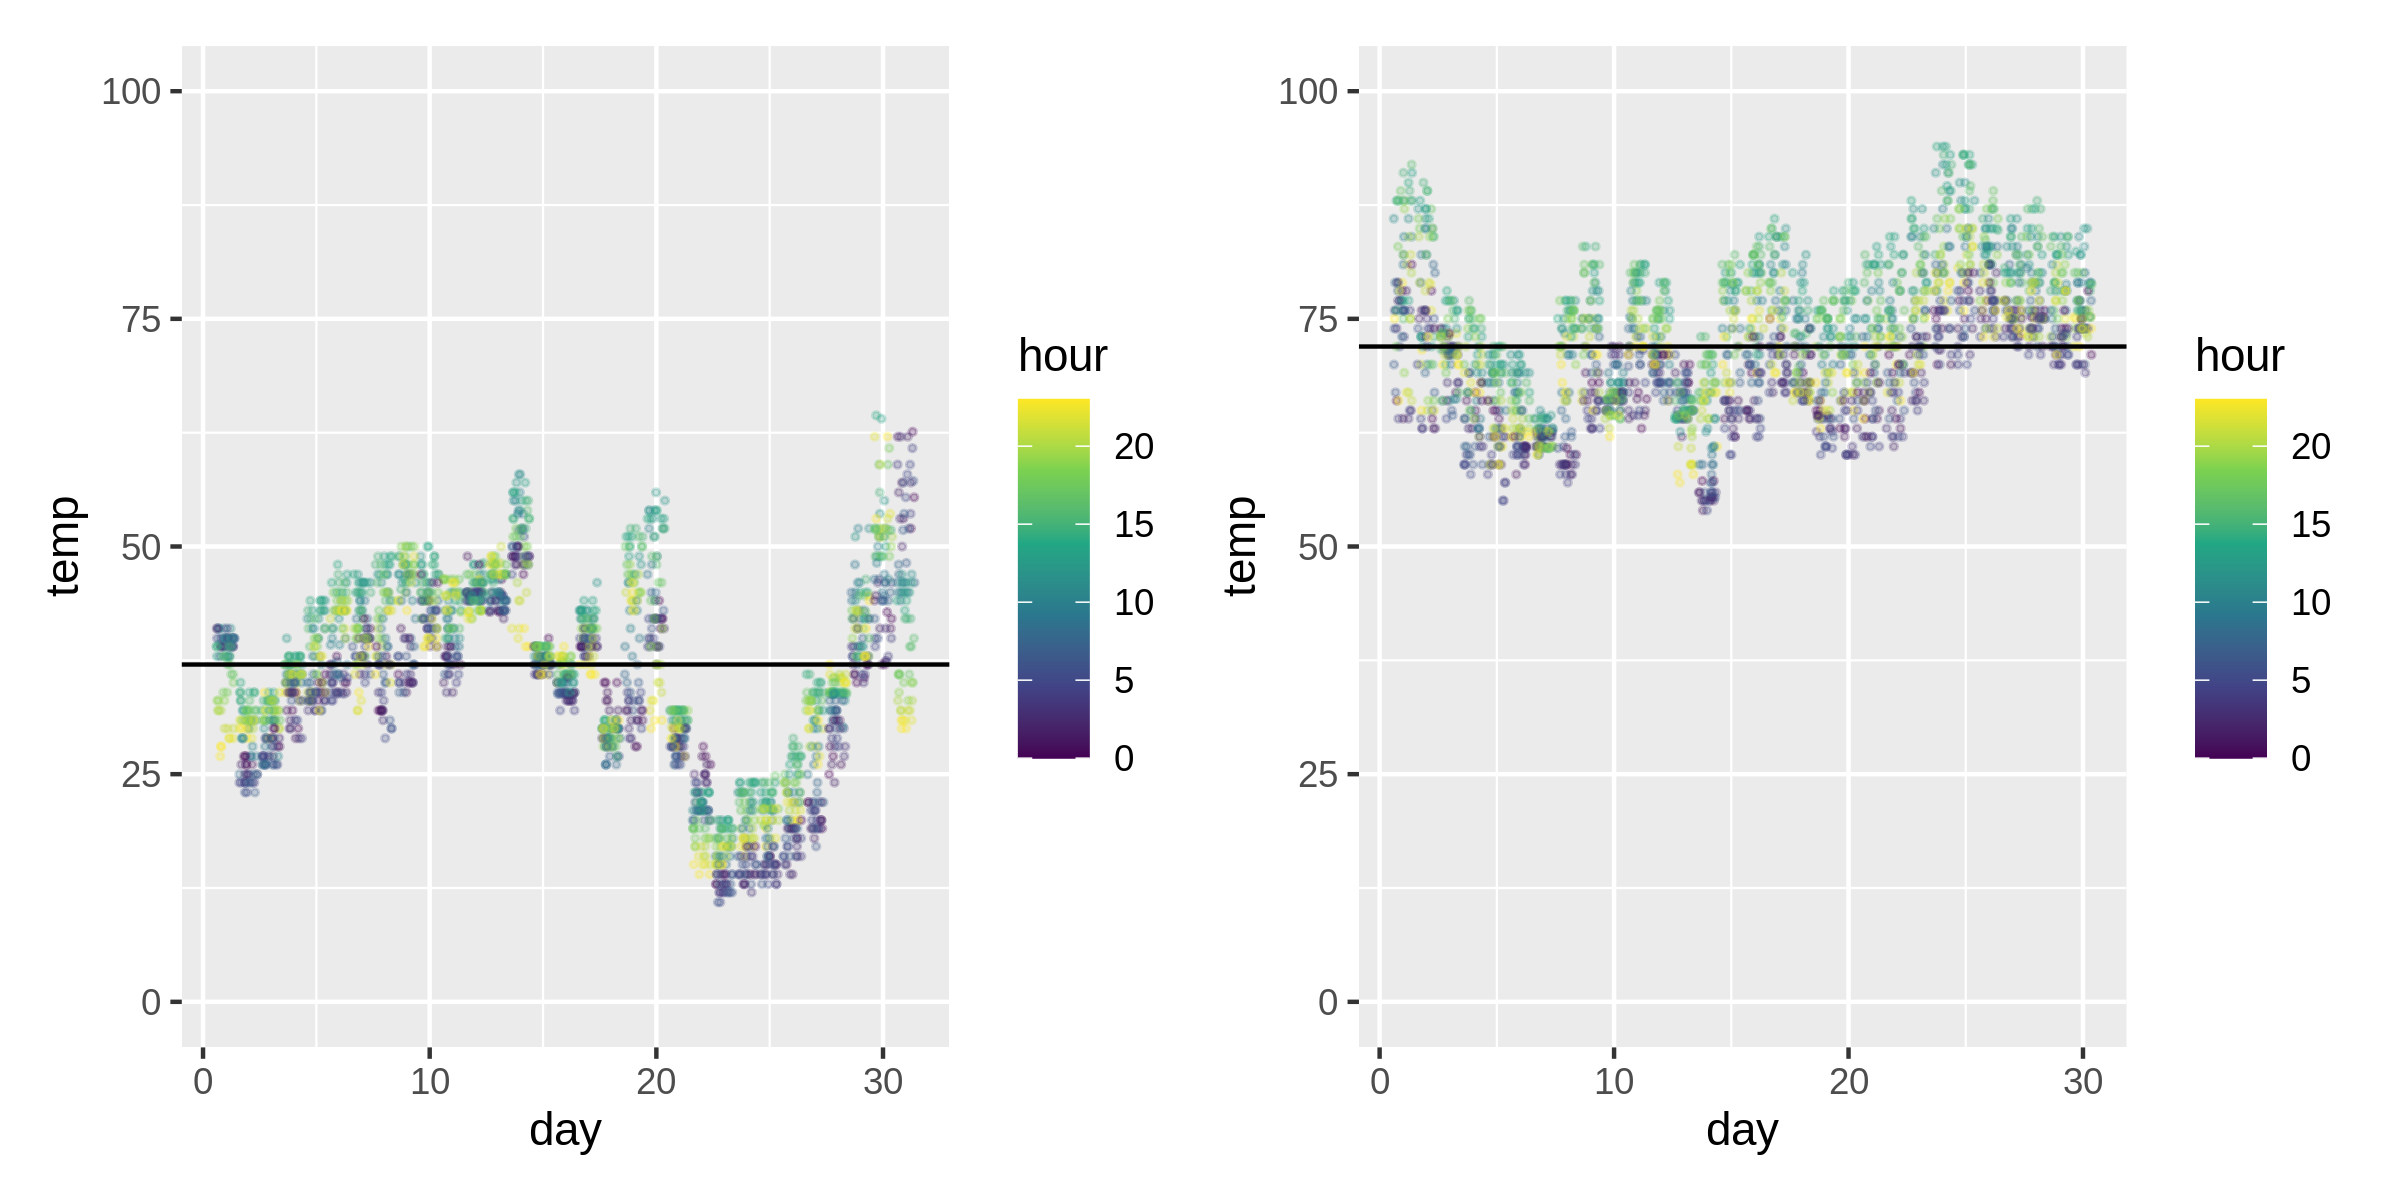

In [41]:
p= ggplot(df.1, aes(x=day, y=temp, color=hour))
p=p+geom_point(alpha = 0.25,size=.5, position = position_jitter(h = 0, w = 0.4))
p=p+geom_hline(data=median.january,aes(yintercept=median.temp))
p=p+scale_color_viridis_c()+ylim(0,100)

q=ggplot(df.6, aes(x=day, y=temp, color=hour))
q=q+geom_point(alpha = 0.25, size=.5,
                   position = position_jitter(h = 0, w = 0.4))
q=q+geom_hline(data=median.june,aes(yintercept=median.temp))
q=q+scale_color_viridis_c() +ylim(0,100)

p+q